# Arboles de Decision (algoritmo ID3)

Conceptos: 
- Self Information: https://en.wikipedia.org/wiki/Information_content
- Entropy: https://en.wikipedia.org/wiki/Entropy_(information_theory)
- Information Gain: https://en.wikipedia.org/wiki/Information_gain_(decision_tree)
- ID3: https://en.wikipedia.org/wiki/ID3_algorithm
- Scikit Learn Decision Tree: https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

Intuicion: queremos disminuir la entropia (que tan mezcladas estan las clases)

![Entropia](img/entropia.png)

In [48]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns

In [49]:
df = pd.read_csv('data/surf_or_not.csv')
df

,clima,temperatura,olas,viento,surf
0,soleado,caluroso,pocas,False,no
1,soleado,caluroso,pocas,True,no
2,nublado,caluroso,pocas,False,si
3,lluvia,templado,pocas,False,si
4,lluvia,fresco,normal,False,si
5,lluvia,fresco,normal,True,no
6,nublado,fresco,normal,True,si
7,soleado,templado,pocas,False,no
8,soleado,fresco,normal,False,si
9,lluvia,templado,normal,False,si


In [138]:
def entropy(data, target):
    entropy = 0
    # Counter crea un diccionario donde el valor 
    # es la cantidad de veces que aparece cada key
    items_in_column = Counter(data[target]) 
    for item in items_in_column:
        p = items_in_column[item]/len(data[target])
        entropy += -(p * np.log2(p))
    return entropy

In [155]:
def information_gain(data, column, target):
    ig = entropy(data, target)
    items_in_column = Counter(data[column])
    for item in items_in_column:
        # para cada subtabla generada por cada categoria de esa columna
        # calcular la probabilidad y la entropia
        subdata = data[data[column]==item]
        prob = len(subdata) / len(data)
        h = entropy(subdata,target)
        ig -= prob * h
    return ig

In [156]:
surf_entropy = entropy(df, "surf")
surf_entropy

0.9402859586706311

In [157]:
subdata = df[["clima","surf"]]
df_soleado = subdata[subdata["clima"]=="soleado"]
df_nublado = subdata[subdata["clima"]=="nublado"]
df_lluvia = subdata[subdata["clima"]=="lluvia"]

In [158]:
prob_soleado = len(df_soleado) / len(data)
entropy_soleado = entropy(df_soleado, "surf")

prob_nublado = len(df_nublado) / len(data)
entropy_nublado = entropy(df_nublado, "surf")

prob_lluvia = len(df_lluvia) / len(data)
entropy_lluvia = entropy(df_lluvia, "surf")

In [159]:
df1_styler = df_soleado.style.set_table_attributes("style='display:inline'").set_caption(f'Soleado <br/>Entropia: {entropy_soleado:0.2f} <br/>Probabilidad: {prob_soleado:0.2f}')
df2_styler = df_nublado.style.set_table_attributes("style='display:inline'").set_caption(f'Nublado <br/>Entropia: {entropy_nublado:0.2f} <br/>Probabilidad: {prob_nublado:0.2f}')
df3_styler = df_lluvia.style.set_table_attributes("style='display:inline'").set_caption(f'Lluvia <br/>Entropia: {entropy_lluvia:0.2f} <br/>Probabilidad: {prob_lluvia:0.2f}')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)
print(f"""Information Gain: {information_gain(df,"clima","surf")}""")

,clima,surf
0,soleado,no
1,soleado,no
7,soleado,no
8,soleado,si
10,soleado,si
,clima,surf
2,nublado,si
6,nublado,si
11,nublado,si
12,nublado,si


Information Gain: 0.24674981977443933


In [166]:
for column in ["temperatura","olas","viento"]:
    subdata = df[[column,"surf"]]
    items_in_column = Counter(data[column])
    df_per_item = []
    html_str = ""
    for item in items_in_column:
        df_tmp = subdata[subdata[column]==item]
        df_per_item.append(df_tmp)
        prob_tmp = len(df_tmp) / len(data)
        entropy_tmp = entropy(df_tmp, "surf")
        df_styler_tmp = df_tmp.style.set_table_attributes("style='display:inline'").set_caption(f'{item} <br/>Entropia: {entropy_tmp:0.2f} <br/>Probabilidad: {prob_tmp:0.2f}')
        html_str += df_styler_tmp._repr_html_()
    print(column)
    display_html(html_str, raw=True)
    print(f"""Information Gain: {information_gain(df,column,"surf")}\n\n""")

temperatura


,temperatura,surf
0,caluroso,no
1,caluroso,no
2,caluroso,si
12,caluroso,si
,temperatura,surf
3,templado,si
7,templado,no
9,templado,si
10,templado,si
11,templado,si


Information Gain: 0.02922256565895487


olas


,olas,surf
0,pocas,no
1,pocas,no
2,pocas,si
3,pocas,si
7,pocas,no
11,pocas,si
13,pocas,no
,olas,surf
4,normal,si
5,normal,no


Information Gain: 0.15183550136234164


viento


,viento,surf
0,False,no
2,False,si
3,False,si
4,False,si
7,False,no
8,False,si
9,False,si
12,False,si
,viento,surf
1,True,no


Information Gain: 0.048127030408269544




Elegimos la columna que genera mayor ganancia de informacion y repetimos la operacion para cada subtabla generada

In [206]:
def decision_tree_ID3(data, target, deep, indent):
    # si la tabla no contine info 
    # o se ha llegado a la profundidad deseada terminar
    if len(data) == 0 or deep == 0: return
    #obtener la ganancia de info para cada columna
    ig = [(information_gain(data, c, target), c) for c in data.columns if c != target]
    max_ig, selected_column = max(ig)
    #si la ganancia de informacion es mayor a cero continuar
    if max_ig > 0:
        print("".rjust(indent, "-") + selected_column)
        items_in_column = Counter(data[selected_column])
        #crear una subtabla para cada categoria
        for item in items_in_column:
            subdata = data[data[selected_column] == item].drop(columns=[selected_column])
            print("".rjust(indent+1, "-") + str(item))
            # realizar el mismo procedimiento para subtabla
            decision_tree_ID3(subdata, target, deep-1, indent+2)

In [207]:
decision_tree_ID3(df, "surf", 10, 0)

clima
-soleado
--olas
---pocas
---normal
-nublado
-lluvia
--viento
---False
---True


## Scikit Learn

In [226]:
from sklearn import tree
one_hot_data = pd.get_dummies(df.drop(columns=['surf']),drop_first=True)
one_hot_data.head()

,viento,clima_nublado,clima_soleado,temperatura_fresco,temperatura_templado,olas_pocas
0,False,0,1,0,0,1
1,True,0,1,0,0,1
2,False,1,0,0,0,1
3,False,0,0,0,1,1
4,False,0,0,1,0,0


In [212]:
X, y = one_hot_data, df["surf"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

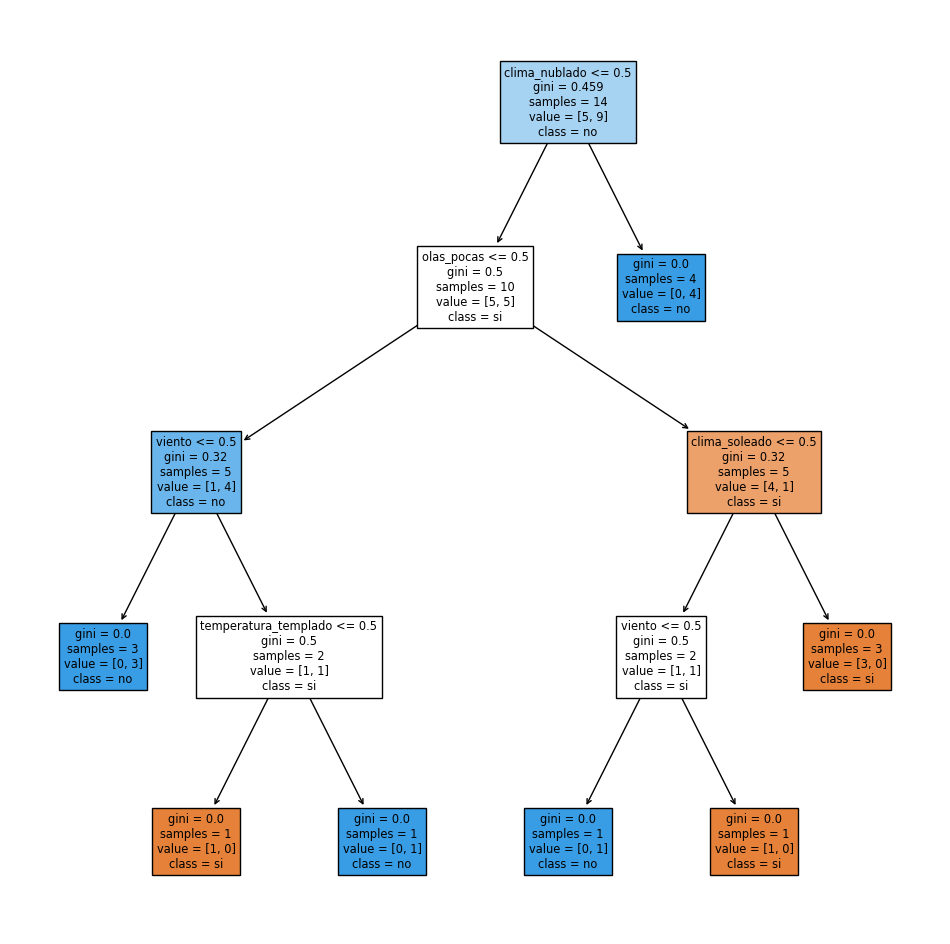

In [225]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, 
               feature_names=["viento",
                              "clima_nublado","clima_soleado",
                              "temperatura_fresco", "temperatura_templado",
                              "olas_pocas"],  
               class_names=["si","no"],
               filled=True);